In [1]:
from data_generators import get_train_test_addition

#dimensjoner og størrelser til x og y
n_digits = 2
n_max = 3*n_digits
m = 10

#definerer størrelsen på parametermatrisene
d = 15
k = 5
p = 20

#henter treningsdata
data = get_train_test_addition(n_digits,samples_per_batch=100,n_batches_train=4)

In [2]:
from utils import onehot

x = data['x_train'][0]
X = onehot(x,m)
y = data['y_train'][0]

In [3]:
data['x_train'].shape

(4, 100, 6)

In [4]:
from layers import LinearLayer,EmbedPosition,Attention,Softmax,CrossEntropy,FeedForward

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

In [5]:
#vi ser at dLdW_2 tilhørende ff1 (først finner vi det lineære laget l2
#så nøkkel 'w' i params dict-en, så nøkkel 'd' for å finne den deriverte)
#nå er denne bare en nullmatrise 
ff1.l2.params['w']['d']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [6]:
#"manuelt" forward pass (tilsvarende algoritme 1)
z0 = embed.forward(X)
z1 = att1.forward(z0)
z2 = ff1.forward(z1)
z = un_embed.forward(z2)
Z = softmax.forward(z)

In [7]:
#evaluerer objektfunksjonen
L = loss.forward(Z,y)
print(L)

#finner den deriverte av objektfunksjonen mhp Z
dLdZ = loss.backward()

2.7267336422227904


In [8]:
#"manuelt" backward pass (tilsvarende algoritme 2)
dLdz = softmax.backward(dLdZ)
print('1')
dLdz2 = un_embed.backward(dLdz)
print('2')
dLdz1 = ff1.backward(dLdz2)
print('3')
dLdz0 = att1.backward(dLdz1)
print('4')
embed.backward(dLdz0)

1
2
3
4


In [9]:
#etter backward pass har dLdW_2 fått verdier
ff1.l2.params['w']['d']

array([[-3.68595248e-01, -2.77424839e-01, -8.83129925e-01,
        -1.18764225e-01, -3.24786897e+00, -9.27930652e-02,
        -1.12441900e+00, -4.86294013e-01, -2.90873454e+00,
        -1.16151620e+00,  3.19937245e-02, -8.53362250e-01,
        -1.16165141e-01, -1.29308139e+00, -1.26341877e-01,
        -5.19737695e-01, -1.80782200e+00, -4.59972157e+00,
         1.91909480e-02, -1.44759367e-01],
       [-5.06758547e-01, -4.83924936e-01, -4.28117362e-01,
         1.20658279e-01, -2.19866994e+00,  1.68918569e-01,
        -7.14569455e-01, -9.18065298e-01, -2.53914032e+00,
        -2.31334211e-01,  2.35248420e-01, -4.91751584e-01,
        -3.44724500e-02, -1.52391092e+00, -1.54438493e-01,
         5.28529860e-02, -1.77802731e+00, -5.05612416e+00,
         2.04410375e-01,  2.26999789e-01],
       [-6.75366762e-01, -1.62745944e+00,  8.21607044e-02,
        -3.30482024e-01, -9.50090530e-01, -2.44796205e-01,
        -2.40034255e-01, -2.26704696e+00, -1.27647926e+00,
         6.99621747e-01, -3.9

In [10]:
from neural_network import NeuralNetwork

#vi kan samle lagene i en liste som vi bruker for å
#initialisere et nevralt nettverk der vi kan bruke forward() og backward() 
#for å oppnå det samme som vi gjorde manuelt over

layers = [embed,att1,ff1,un_embed,softmax]
nn = NeuralNetwork(layers)

In [11]:
#forward pass tilsvarende algoritme 1
Z = nn.forward(X)

#beregner loss med CrossEntropy
L = loss.forward(Z,y)
print(L)

#backward pass tilsvarende algoritme 2
dLdZ = loss.backward()
nn.backward(dLdZ)

2.7267336422227904


In [12]:
#før optimering er W_2[0,0] gitt ved
#ff1 er det tredje laget i layers-listen (derav layers[2])
W_2_pre_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_pre_opt[0,0])

-0.030103984815156228


In [17]:
import numpy as np
def algorithm_4(x, y, m , d, p, k, n_max):
    n_iter = 100
    loss = CrossEntropy()
    L_arr = np.zeros(n_iter)
    feed_forward1 = FeedForward(d,p)
    attention1 = Attention(d,k)
    embed_pos = EmbedPosition(n_max,m,d)
    un_embed_pos = LinearLayer(d,m)
    softmax = Softmax()
    layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
    nueralnet = NeuralNetwork(layers)

    alpha = 0.001
    Losses = []
    for j in range(1,n_iter):
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        layers[0].step_gd(alpha)
        layers[1].step_adam(j, alpha)
        layers[2].step_gd(alpha)
        layers[3].step_adam(j, alpha)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y, m , d, p, k, n_max)

loss for iteration 1: 2.554074092324369
loss for iteration 2: 2.5126435806371075
loss for iteration 3: 2.4814544691316995
loss for iteration 4: 2.4552454142695272
loss for iteration 5: 2.4322222273372716
loss for iteration 6: 2.4120183008346663
loss for iteration 7: 2.39426791031798
loss for iteration 8: 2.378526269977427
loss for iteration 9: 2.364374734416674
loss for iteration 10: 2.3515320313879653
loss for iteration 11: 2.3396089954115764
loss for iteration 12: 2.3282161182681813
loss for iteration 13: 2.3169071103645877
loss for iteration 14: 2.305243498084222
loss for iteration 15: 2.292833216540795
loss for iteration 16: 2.2793525827656134
loss for iteration 17: 2.2647341766859186
loss for iteration 18: 2.249213822030801
loss for iteration 19: 2.2331800566179076
loss for iteration 20: 2.2170197241813527
loss for iteration 21: 2.2010589908907083
loss for iteration 22: 2.1855683916410142
loss for iteration 23: 2.170533313710563
loss for iteration 24: 2.155935709667207
loss for it

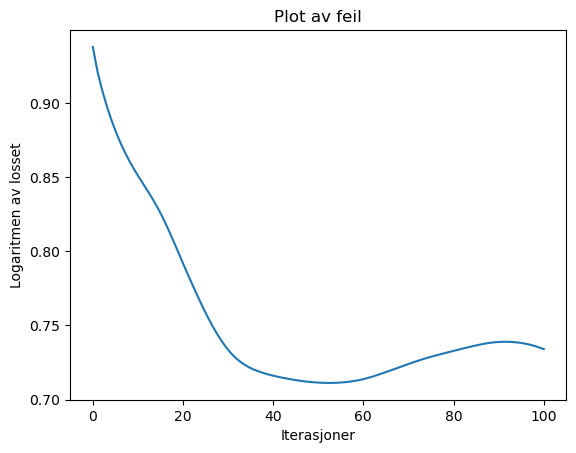

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,100,len(arr)),np.log(arr))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

In [15]:
#etter trening ser vi at W_2 er gitt ved

W_2_post_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_post_opt[0,0])

#dersom differansen er større enn null har dette parameteret endret seg etter 
#gradient descent
print(W_2_post_opt[0,0] - W_2_pre_opt[0,0])




-0.030103984815156228
0.0
